### Subgradient





#### Preliminalty
* $\mathbb{E}$：実数ベクトル空間
* $f: \mathbb{E} \rightarrow(-\infty, \infty]$：真の関数
* $x \in \operatorname{dom}(f)$：$f$の定義域に属するベクトル
* $\mathbb{E}^*$：実数ベクトル空間(但し、ノルムは双対ノルム$\|\cdot\|_{*}$である)
* $g \in \mathbb{E}^*$：$\mathbb{E}^*$に属するベクトル
* $\langle,\rangle$：ベクトルの内積
* 


#### 劣勾配,劣微分の定義
* ある関数のある点における微分(勾配)が成立するとき、その点について接線(接平面)が対応するわけですが、勾配を直接求めるわけではなく接平面を求めよう(近似しよう)とするのがこの物語のプロローグです。
* 何を使って近似するか、アフィン関数を使ってみましょう。アフィン関数とは、一次関数に定数項がついた"平行移動できる"線形関数です。アフィン関数を使って、ある関数$f$のある点$x$に接する接線(接平面)を近似しましょう。

* 接平面について、以下の条件を満たす場合、ベクトル$g \in \mathbb{E}^*$は$f$の$x$における**劣勾配**と呼ばれます。$g$はアフィン関数を構成するベクトルです。
$$
\begin{equation*}
f(\mathbf{y}) \geq f(\mathbf{x})+\langle\mathbf{g}, \mathbf{y}-\mathbf{x}\rangle \text { for all } \mathbf{y} \in \mathbb{E} \tag{3.1}
\end{equation*}
$$

* 幾何学的な直感として、$x$以外の点について、接平面(を近似するアフィン関数)が$f$の値よりも大きな値をとらないという意味です。例えば、二次関数のある点における接線は、接している点以外での接線の値は関数の値より同じか小さいはずです。
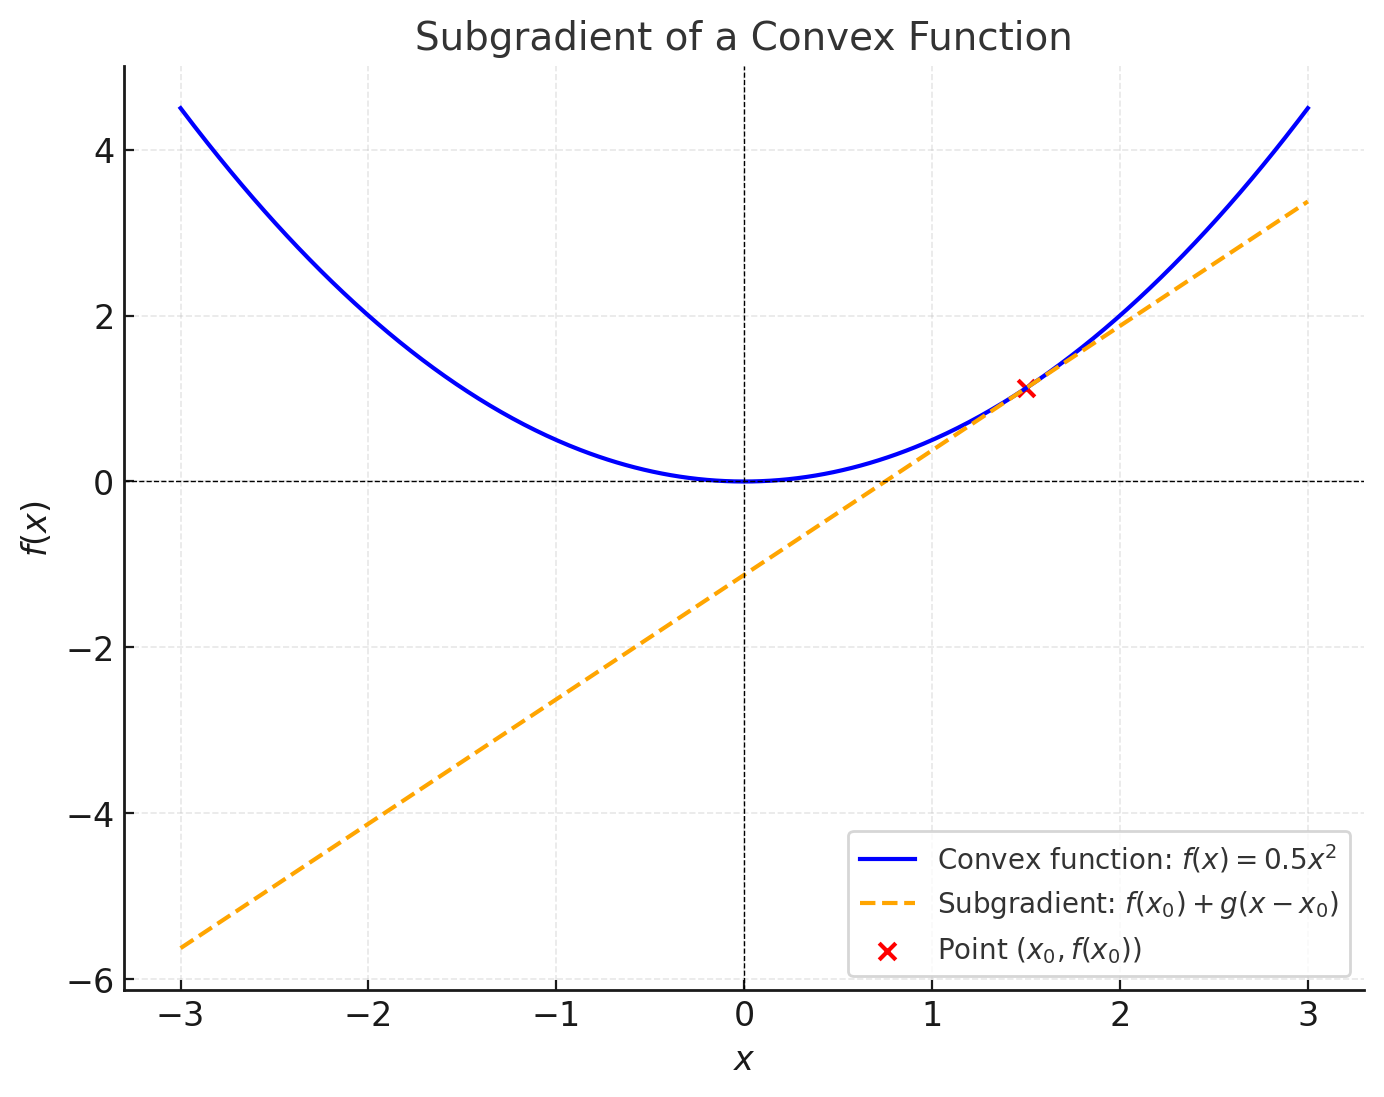

* $\mathbf{y} \notin \operatorname{dom}(f)$ に対しては自明：$f$の定義域以外の領域での関数と接平面の関係に興味がないため $\operatorname{dom}(f)$内の$y$だけを考えるように不等式を書きます。

$$
f(\mathbf{y}) \geq f(\mathbf{x})+\langle\mathbf{g}, \mathbf{y}-\mathbf{x}\rangle \text { for all } \mathbf{y} \in \operatorname{dom}(f)
$$

* $3.1$を満たす接平面(を表現する劣勾配)は複数の場合があります。図1において、接点を固定して接線をシーソーのように動かせば複数あるというのがわかると思います。

* 劣勾配の集合を**劣微分**といいます。定義は以下の通りです。$\partial f(\mathbf{x})$ と表現します。
$$
\partial f(\mathbf{x}) \equiv\left\{\mathbf{g} \in \mathbb{E}^{*}: f(\mathbf{y}) \geq f(\mathbf{x})+\langle\mathbf{g}, \mathbf{y}-\mathbf{x}\rangle \text { for all } \mathbf{y} \in \mathbb{E}\right\}
$$

##### 例示






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 函数 f(x) = ||x|| を定義 (Euclidean Norm)
def norm(x):
    return np.linalg.norm(x, ord=2)

# 双対ノルムを計算
def dual_norm(g):
    return np.linalg.norm(g, ord=2)

# 単位球を描画 (原点を中心とする半径1のノルムの球)
theta = np.linspace(0, 2 * np.pi, 100)
unit_ball_x = np.cos(theta)
unit_ball_y = np.sin(theta)

# 双対ノルム単位球
dual_unit_ball_x = np.cos(theta)
dual_unit_ball_y = np.sin(theta)

# 点 (x, y) の双対ノルムベクトルに対する内積チェック
x = np.array([1, 1])
dual_g = x / norm(x)  # 双対ノルムの単位ベクトル

# 描画
plt.figure(figsize=(8, 8))

# ノルムの単位球
plt.plot(unit_ball_x, unit_ball_y, label="Norm Unit Ball $||\\mathbf{y}|| \\leq 1$", color="blue")

# 双対ノルムの単位球
plt.plot(dual_unit_ball_x, dual_unit_ball_y, label="Dual Norm Unit Ball $||\\mathbf{g}||_* \\leq 1$", color="orange", linestyle="--")

# 双対ノルム内のベクトルを描画
plt.quiver(0, 0, dual_g[0], dual_g[1], angles="xy", scale_units="xy", scale=1, color="red", label="$\\mathbf{g}$ in Dual Norm Unit Ball")

# グラフ設定
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.title("Norm and Dual Norm Unit Balls", fontsize=14)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.axis("equal")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


#### 劣微分の性質

* 劣微分はいい感じの性質を持っています。$\partial f(\mathbf{x})$ は、任意の $\mathbf{x} \in \mathbb{E}$ に対して**閉じて凸である**ということです。収束の議論や凸最適化の議論を行うことができます。

**証明**
* aaa

##### 劣微分可能性(性質)
* $f$の$x$について、劣微分の要素空でない($\partial f(\mathbf{x}) \neq \emptyset$)の場合、$f$ は $\mathbf{x}$ で**劣微分可能**といいます。

##### 劣微分可能な関数の点集合(定義)
* 劣微分可能な関数の点の集合を$\operatorname{dom}(\partial f)=\{\mathbf{x} \in \mathbb{E}: \partial f(\mathbf{x}) \neq \emptyset\}$と定義します。

##### 劣微分可能ならば凸(補題 3.11)
* 任意の$x$について、劣微分が空でない場合、$f$は凸になるといういい性質があります。

**証明**
* aaa

##### 実数値関数は劣微分可能
* $f: \mathbb{E} \rightarrow \mathbb{R}$ を凸関数とします。このとき、$f$ は $\mathbb{E}$ 上で劣微分可能です。

##### 凸ならば任意の点で劣微分可能？
* とは限らないです。そのような例を挙げます。**TODO**
* とはいえ、定義域の任意の点で劣微分可能でなかったとしても**任意の内点**で劣微分可能です。内点とは、点の近傍が凸集合外に存在しない点のことです。これは**支持超平面定理**が関わっています。

##### 支持超平面と内点
* 支持超平面とは、ある凸集合と外部の任意の点の間にある、互いを分離できる超平面($n$次元の平面)のことです。支持超平面定理とは凸集合内の任意の点$x \in C$と$C$の内点に属さない任意の点$y$に対して、$\langle\mathbf{p}, \mathbf{x}\rangle \leq\langle\mathbf{p}, \mathbf{y}\rangle$が成立するベクトル$\mathbf{p} \in \mathbb{E}^{*}$が存在するというものです。
* 直感的な理解を得るために図示をしましょう。支持超平面に対する法線ベクトルを$p$考えます。$\langle\mathbf{p}, \mathbf{x}\rangle$は、$p$に対する$x$の射影を示しています。
$\langle\mathbf{p}, \mathbf{y}\rangle$も同様です。図からわかるように、２つの射影の大小関係が定理の条件であれば、支持超平面を作ることができますが、大小関係が逆転する場合、凸集合と外部点を分離できないため、支持超平面を作ることはできません。

![output (2).png](<attachment:output (2).png>)



* 定義域の内点は、劣微分可能であり、かつ有界です。
**定理 3.14 (定義域の内部点における劣微分集合の非空性と有界性)**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、$\tilde{\mathbf{x}} \in \operatorname{int}(\operatorname{dom}(f))$ と仮定する。このとき、$\partial f(\tilde{\mathbf{x}})$ は空ではなく、有界である。

* 閉じていて有界な集合(コンパクト集合)に対しても劣勾配は存在し、有界です。**定理 3.16 (コンパクト集合上の劣勾配の有界性)**  $f$ : $\mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、$X \subseteq \operatorname{int}(\operatorname{dom}(f))$ が空ではなく、コンパクトであると仮定する。このとき、$Y=\bigcup_{\mathbf{x} \in X} \partial f(\mathbf{x})$ は空ではなく、有界である。


$$
\operatorname{ri}(S)=\{\mathbf{x} \in \operatorname{aff}(S): B[\mathbf{x}, \varepsilon] \cap \operatorname{aff}(S) \subseteq S \text { for some } \varepsilon>0\}
$$

定理3.17～定理3.20 TODO


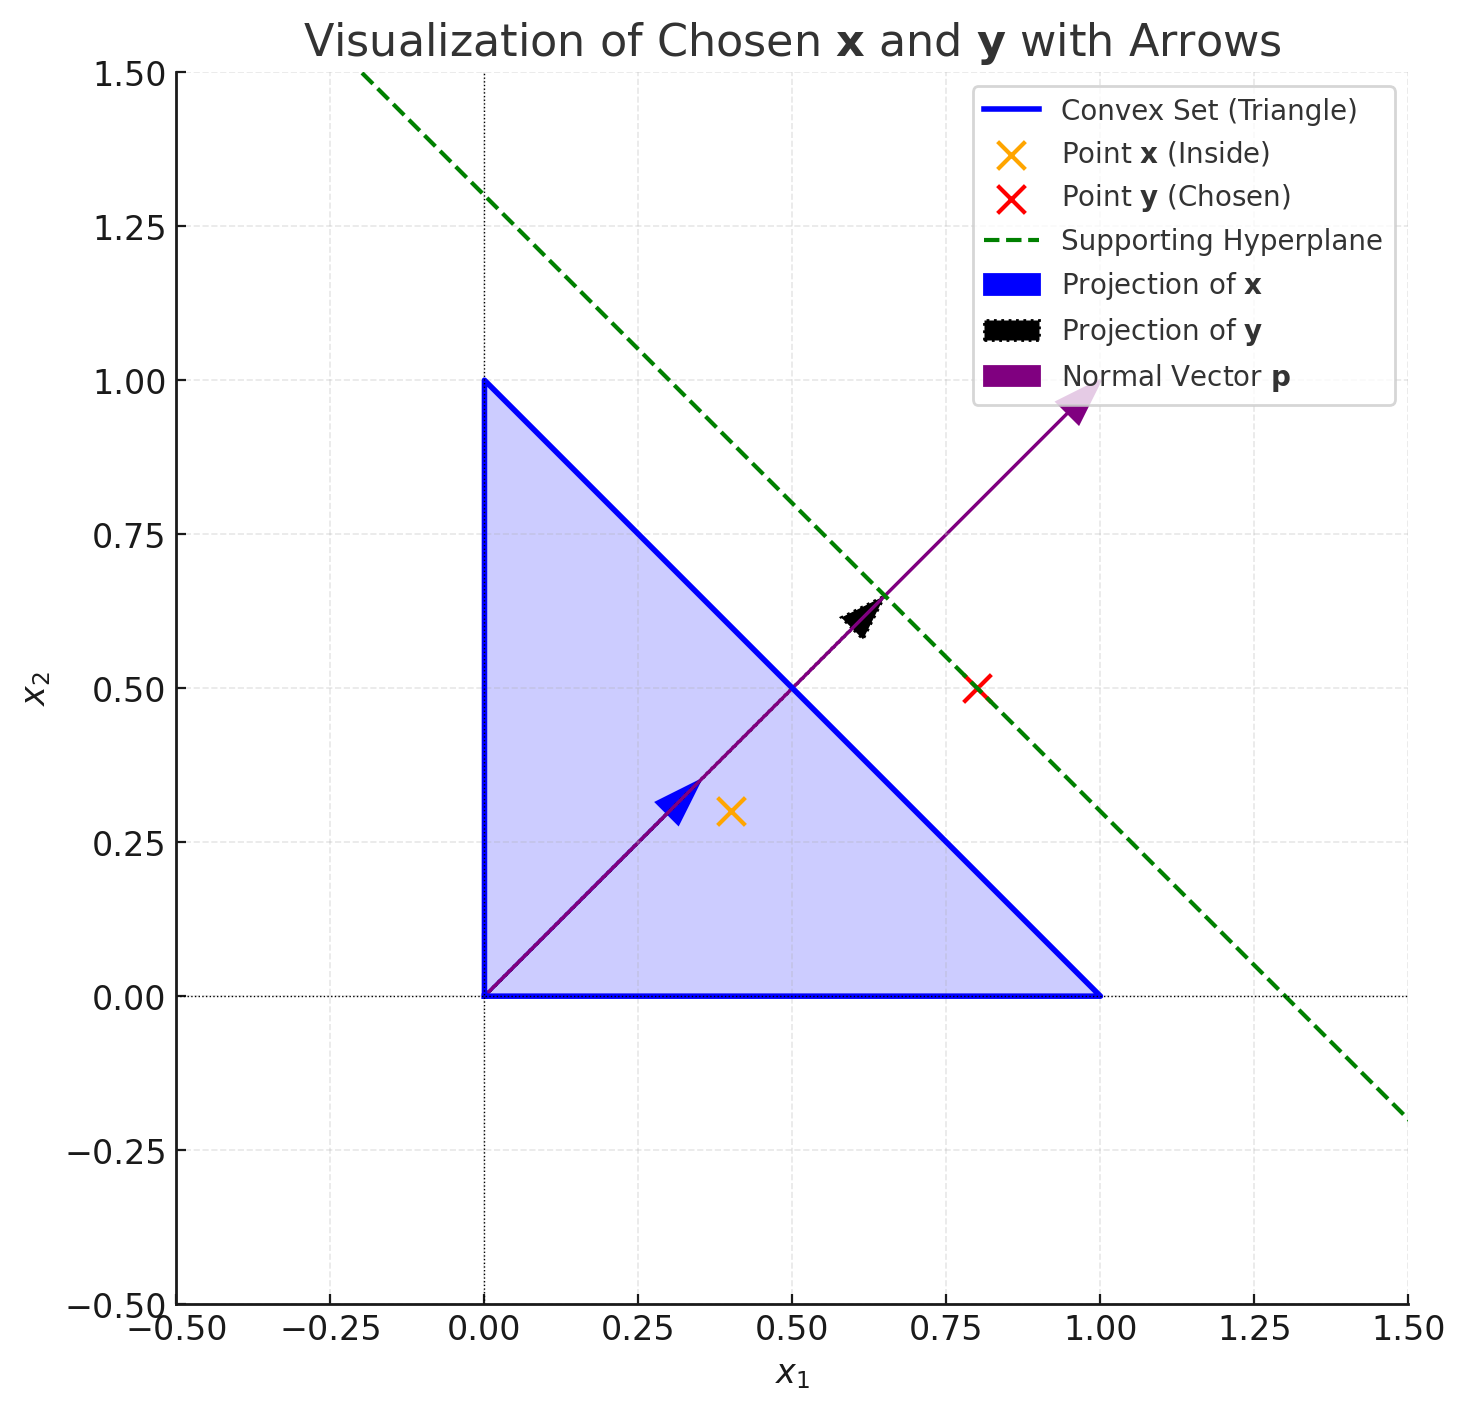

#### 方向微分

##### 定義
内点$x$における$f$の方向微分を以下のように定義します。
$$
f^{\prime}(\mathbf{x} ; \mathbf{d}) \equiv \lim _{\alpha \rightarrow 0^{+}} \frac{f(\mathbf{x}+\alpha \mathbf{d})-f(\mathbf{x})}{\alpha}
$$
方向微分とは、関数のある点に対して方向を決め、その方向の変化率を示すものです。

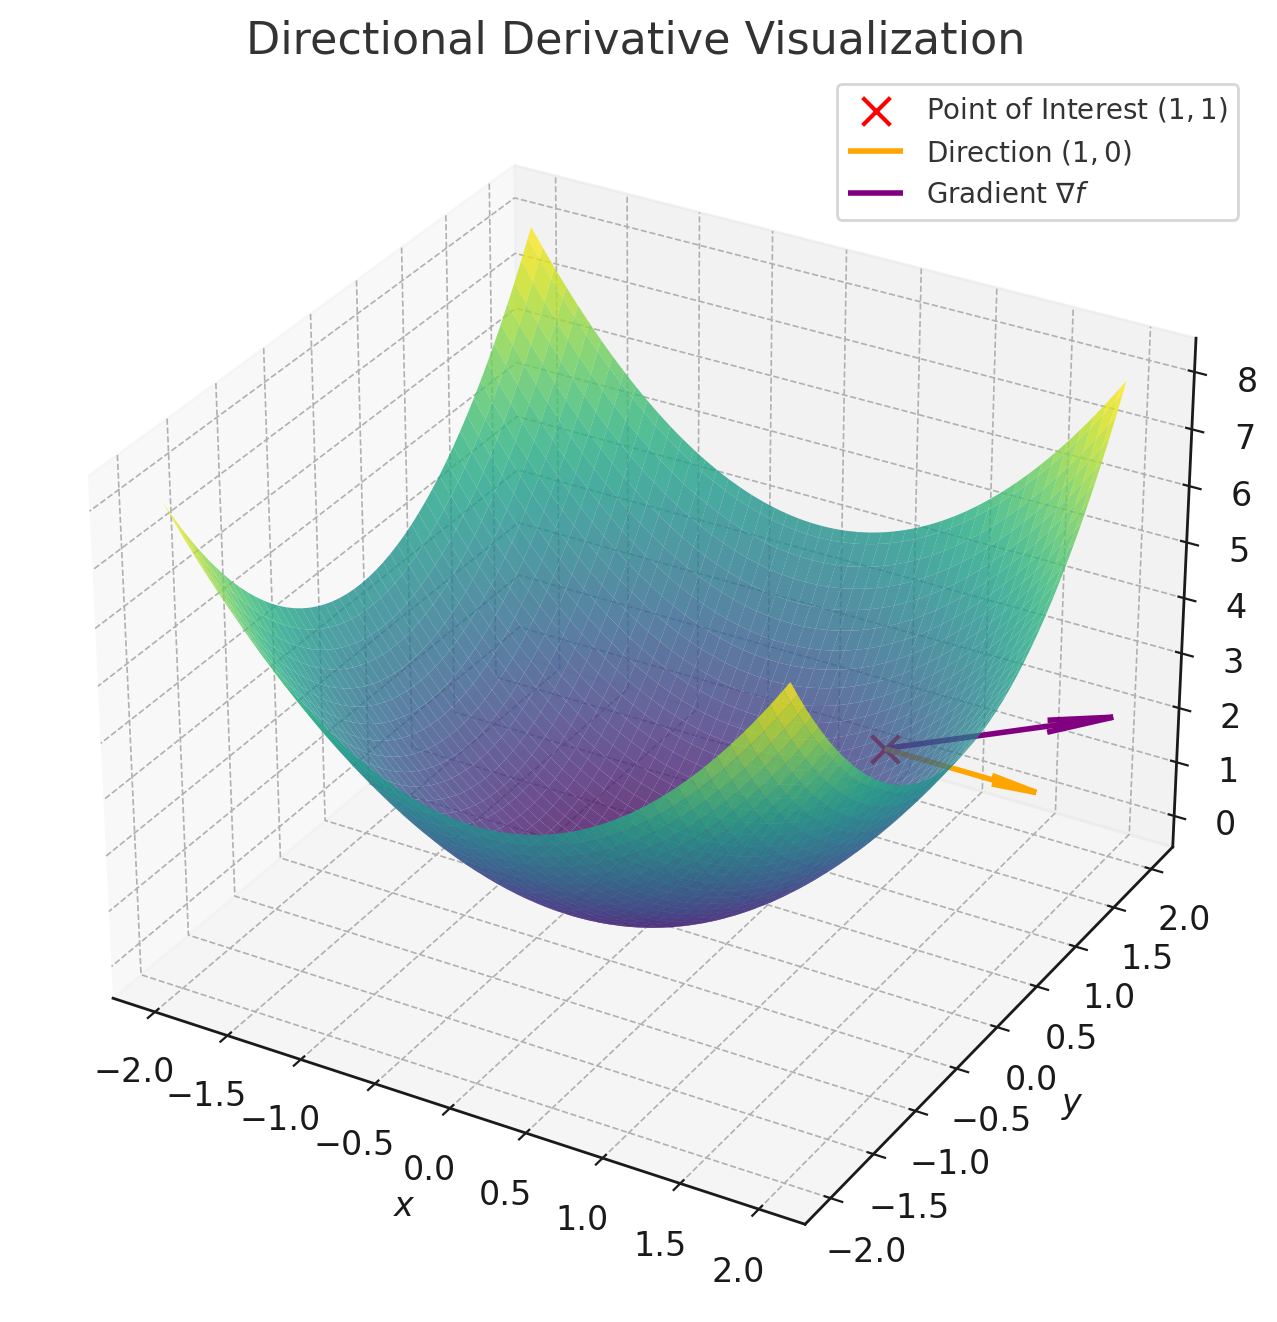

##### 定理と補題
* $\mathbf{x} \in \operatorname{int}(\operatorname{dom}(f))$

**定理 $3.21$**
任意の $\mathbf{d} \in \mathbb{E}$ に対して、方向微分 $f^{\prime}(\mathbf{x} ; \mathbf{d})$ は存在する。

* 定義域の内点においては、任意のベクトルに対して方向微分を定義できます。

**補題 3.22 ( 関数$\mathbf{d} \mapsto f^{\prime}(\mathbf{x} ; \mathbf{d})$ の凸性と同次性)**  $f: \mathbb{E} \rightarrow$ $(-\infty, \infty]$ を真の凸関数とし、$\mathbf{x} \in \operatorname{int}(\operatorname{dom}(f))$ とする。このとき、
(a) 関数 $\mathbf{d} \mapsto f^{\prime}(\mathbf{x} ; \mathbf{d})$ は凸である。
(b) 任意の $\lambda \geq 0$ と $\mathbf{d} \in \mathbb{E}$ に対して、$f^{\prime}(\mathbf{x} ; \lambda \mathbf{d})=\lambda f^{\prime}(\mathbf{x} ; \mathbf{d})$ が成り立つ。

* 任意のベクトルから方向微分への関数は凸であり、任意の非負スカラー倍したベクトルの方向微分は、スカラー倍した方向微分と等しくなります。

**補題 3.23**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、$\mathrm{x} \in$ $\operatorname{int}(\operatorname{dom}(f))$ とする。このとき、

$$
f(\mathbf{y}) \geq f(\mathbf{x})+f^{\prime}(\mathbf{x} ; \mathbf{y}-\mathbf{x}) \text { for all } \mathbf{y} \in \operatorname{dom}(f)
$$

が成り立つ。

* TODO

**定理 3.24 (関数の最大値の方向微分)**  $f(\mathbf{x})=\max \left\{f_{1}(\mathbf{x}), f_{2}(\mathbf{x}), \ldots, f_{m}(\mathbf{x})\right\}$ とする。ここで、$f_{1}, f_{2}, \ldots, f_{m}: \mathbb{E} \rightarrow(-\infty, \infty]$ は真の関数である。$\mathbf{x} \in \bigcap_{i=1}^{m} \operatorname{int}\left(\operatorname{dom}\left(f_{i}\right)\right)$ および $\mathbf{d} \in \mathbb{E}$ とする。任意の $i \in\{1,2, \ldots, m\}$ に対して $f_{i}^{\prime}(\mathbf{x} ; \mathbf{d})$ が存在すると仮定する。このとき、

$$
f^{\prime}(\mathbf{x} ; \mathbf{d})=\max _{i \in I(\mathbf{x})} f_{i}^{\prime}(\mathbf{x} ; \mathbf{d})
$$

が成り立つ。ここで、$I(\mathbf{x})=\left\{i: f_{i}(\mathbf{x})=f(\mathbf{x})\right\}$ である。

* ある点における方向微分は、その点で値が最大になる関数の方向微分となるということです。最大の関数の方向微分が支配的になるということです。

##### 最大値公式

* 方向微分が勾配の最大値と対応する最大値公式をしめします。

**定理 3.26 (最大値公式)**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とする。このとき、任意の $\mathbf{x} \in \operatorname{int}(\operatorname{dom}(f))$ と $\mathbf{d} \in \mathbb{E}$ に対して、

$$
\begin{equation*}
f^{\prime}(\mathbf{x} ; \mathbf{d})=\max \{\langle\mathbf{g}, \mathbf{d}\rangle: \mathbf{g} \in \partial f(\mathbf{x})\} \tag{3.17}
\end{equation*}
$$

が成り立つ。




#### 微分可能性
* 通常の勾配に戻りましょう。そこから方向微分を考えてみます。通常の微分可能性とは、**フレシェ微分可能性**という定義です。

$$
\begin{equation*}
\lim _{\mathbf{h} \rightarrow \mathbf{0}} \frac{f(\mathbf{x}+\mathbf{h})-f(\mathbf{x})-\langle\mathbf{g}, \mathbf{h}\rangle}{\|\mathbf{h}\|}=0 \tag{3.21}
\end{equation*}
$$
* $\mathbf{g}$ は、$\mathbf{x}$ における $f$ の**勾配**と呼ばれ、$\nabla f(\mathbf{x})$ で表されます。

##### 微分可能性と方向微分
**定理 3.29 (微分可能性の点における方向微分)**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真とし、$f$ は $\mathbf{x} \in \operatorname{int}(\operatorname{dom} f)$ で微分可能であるとする。このとき、任意の $\mathbf{d} \in \mathbb{E}$ に対して、

$$
\begin{equation*}
f^{\prime}(\mathbf{x} ; \mathbf{d})=\langle\nabla f(\mathbf{x}), \mathbf{d}\rangle \tag{3.22}
\end{equation*}
$$

が成り立つ。

##### 微分可能性と劣微分

**定理 3.33 (微分可能性の点における劣微分)**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、$\mathrm{x} \in \operatorname{int}(\operatorname{dom}(f))$ とする。$f$ が $\mathbf{x}$ で微分可能である場合、$\partial f(\mathbf{x})=\{\nabla f(\mathbf{x})\}$ である。逆に、$f$ が $\mathbf{x}$ で一意の劣勾配を持つ場合、$f$ は $\mathbf{x}$ で微分可能であり、$\partial f(\mathbf{x})=\{\nabla f(\mathbf{x})\}$ である。

#### 劣勾配の計算
* 劣勾配や劣微分に関するいくつかの計算に関する性質を示します。

##### 劣微分の演算性質

* 劣微分を足したり引いたり掛けたりの演算をするときの性質です。

**定理 3.35**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の関数とし、$\alpha>0$ とする。このとき、任意の $\mathbf{x} \in \operatorname{dom}(f)$ に対して、

$$
\partial(\alpha f)(\mathbf{x})=\alpha \partial f(\mathbf{x})
$$

が成り立つ。

**定理 3.36**  $f_{1}, f_{2}: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、$\mathbf{x} \in \operatorname{dom}\left(f_{1}\right) \cap \operatorname{dom}\left(f_{2}\right)$ とする。
(a) 以下の包含が成り立つ。

$$
\partial f_{1}(\mathbf{x})+\partial f_{2}(\mathbf{x}) \subseteq \partial\left(f_{1}+f_{2}\right)(\mathbf{x})
$$

(b) $\mathbf{x} \in \operatorname{int}\left(\operatorname{dom}\left(f_{1}\right)\right) \cap \operatorname{int}\left(\operatorname{dom}\left(f_{2}\right)\right)$ の場合、以下が成り立つ。

$$
\partial\left(f_{1}+f_{2}\right)(\mathbf{x})=\partial f_{1}(\mathbf{x})+\partial f_{2}(\mathbf{x})
$$


**系 3.38**  $f_{1}, f_{2}, \ldots, f_{m}: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、$\mathbf{x} \in \cap_{i=1}^{m} \operatorname{dom}\left(f_{i}\right)$ とする。
(a) (劣微分計算の弱い和の規則) 以下の包含が成り立つ。

$$
\sum_{i=1}^{m} \partial f_{i}(\mathbf{x}) \subseteq \partial\left(\sum_{i=1}^{m} f_{i}\right)(\mathbf{x})
$$

(b) $\mathbf{x} \in \cap_{i=1}^{m} \operatorname{int}\left(\operatorname{dom}\left(f_{i}\right)\right)$ の場合、以下が成り立つ。

$$
\begin{equation*}
\partial\left(\sum_{i=1}^{m} f_{i}\right)(\mathbf{x})=\sum_{i=1}^{m} \partial f_{i}(\mathbf{x}) \tag{3.37}
\end{equation*}
$$


**系 3.39**  $f_{1}, f_{2}, \ldots, f_{m}: \mathbb{E} \rightarrow \mathbb{R}$ を実数値凸関数とする。このとき、任意の $\mathbf{x} \in \mathbb{E}$ に対して、

$$
\partial\left(\sum_{i=1}^{m} f_{i}\right)(\mathbf{x})=\sum_{i=1}^{m} \partial f_{i}(\mathbf{x})
$$

が成り立つ。

**定理 3.40 (劣微分計算の和の規則 [108, 定理 23.8])**  $f_{1}, f_{2}, \ldots, f_{m}: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、$\bigcap_{i=1}^{m} \operatorname{ri}\left(\operatorname{dom}\left(f_{i}\right)\right) \neq \emptyset$ と仮定する。このとき、任意の $\mathbf{x} \in \mathbb{E}$ に対して、

$$
\partial\left(\sum_{i=1}^{m} f_{i}\right)(\mathbf{x})=\sum_{i=1}^{m} \partial f_{i}(\mathbf{x})
$$

が成り立つ。

##### アフィン変換

**定理 3.43**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、$\mathcal{A}: \mathbb{V} \rightarrow \mathbb{E}$ を線形変換とする。$h(\mathbf{x})=f(\mathcal{A}(\mathbf{x})+\mathbf{b})$ とし、ここで $\mathbf{b} \in \mathbb{E}$ とする。$h$ は真である、つまり、

$$
\operatorname{dom}(h)=\{\mathbf{x} \in \mathbb{V}: \mathcal{A}(\mathbf{x})+\mathbf{b} \in \operatorname{dom}(f)\} \neq \emptyset
$$

であると仮定する。
(a) (劣微分計算の弱いアフィン変換規則) 任意の $\mathbf{x} \in \operatorname{dom}(h)$ に対して、

$$
\mathcal{A}^{T}(\partial f(\mathcal{A}(\mathbf{x})+\mathbf{b})) \subseteq \partial h(\mathbf{x})
$$

が成り立つ。
(b) (劣微分計算のアフィン変換規則) $\mathbf{x} \in \operatorname{int}(\operatorname{dom}(h))$ および $\mathcal{A}(\mathbf{x})+\mathbf{b} \in \operatorname{int}(\operatorname{dom}(f))$ の場合、以下が成り立つ。

$$
\partial h(\mathbf{x})=\mathcal{A}^{T}(\partial f(\mathcal{A}(\mathbf{x})+\mathbf{b}))
$$


##### 関数の合成と劣微分、連鎖律

**定理 3.46(復習：合成関数)**  $f$ は $[a, b](a<b)$ 上で連続であり、$f_{+}^{\prime}(a)$ が存在するとする。$g$ を $f$ の値域を含む開区間 $I$ 上で定義された関数とし、$g$ は $f(a)$ で微分可能であると仮定する。このとき、関数

$$
h(t)=g(f(t)) \quad(a \leq t \leq b)
$$

は $t=a$ で右微分可能であり、

$$
h_{+}^{\prime}(a)=g^{\prime}(f(a)) f_{+}^{\prime}(a)
$$

が成り立つ。

**定理 3.47 (劣微分計算の連鎖律)**  $f: \mathbb{E} \rightarrow \mathbb{R}$ を凸関数とし、$g: \mathbb{R} \rightarrow \mathbb{R}$ を非減少な凸関数とする。$\mathbf{x} \in \mathbb{E}$ とし、$g$ は点 $f(\mathbf{x})$ で微分可能であるとする。$h=g \circ f$ とする。このとき、

$$
\partial h(\mathbf{x})=g^{\prime}(f(\mathbf{x})) \partial f(\mathbf{x})
$$

が成り立つ。

* 凸関数の最大値における劣微分集合を計算するときの規則です。

**定理 3.50 (劣微分計算の最大値規則)**  $f_{1}, f_{2}, \ldots, f_{m}$ : $\mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とし、以下を定義する。

$$
f(\mathbf{x})=\max \left\{f_{1}(\mathbf{x}), f_{2}(\mathbf{x}), \ldots, f_{m}(\mathbf{x})\right\}
$$

$\mathbf{x} \in \bigcap_{i=1}^{m} \operatorname{int}\left(\operatorname{dom}\left(f_{i}\right)\right)$ とする。このとき、

$$
\partial f(\mathbf{x})=\operatorname{conv}\left(\cup_{i \in I(\mathbf{x})} \partial f_{i}(\mathbf{x})\right)
$$

が成り立つ。ここで、$I(\mathbf{x})=\left\{i \in\{1,2, \ldots, m\}: f_{i}(\mathbf{x})=f(\mathbf{x})\right\}$ である。

* インデックス集合が無限などの任意の場合でも**弱い**計算規則を示すことができる。

**定理 3.55 (劣微分計算の弱い最大値規則)**  $I$ を任意の集合とし、任意の $i \in I$ は真の凸関数 $f_{i}: \mathbb{E} \rightarrow(-\infty, \infty]$ に関連付けられているとする。以下をとする。

$$
\begin{equation*}
f(\mathbf{x})=\max _{i \in I} f_{i}(\mathbf{x}) \tag{3.50}
\end{equation*}
$$

このとき、任意の $\mathbf{x} \in \operatorname{dom}(f)$ に対して、

$$
\begin{equation*}
\operatorname{conv}\left(\cup_{i \in I(\mathbf{x})} \partial f_{i}(\mathbf{x})\right) \subseteq \partial f(\mathbf{x}) \tag{3.51}
\end{equation*}
$$

が成り立つ。ここで、$I(\mathbf{x})=\left\{i \in I: f(\mathbf{x})=f_{i}(\mathbf{x})\right\}$ である。


 

#### リプシッツ連続性と劣勾配

**定理 3.61 (リプシッツ連続性と劣微分集合の有界性)**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真かつ凸な関数とする。$X \subseteq \operatorname{int}(\operatorname{dom} f)$ とする。次の 2 つの主張を考える。

* (i) 任意の $\mathbf{x}, \mathbf{y} \in X$ に対して、$|f(\mathbf{x})-f(\mathbf{y})| \leq L\|\mathbf{x}-\mathbf{y}\|$ が成り立つ。(縮小性がある)

* (ii) 任意の $\mathbf{g} \in \partial f(\mathbf{x}), \mathbf{x} \in X$ に対して、$\|\mathbf{g}\|_{*} \leq L$ が成り立つ。(劣勾配のノルムが有界)

このとき、(ii) ならば (i) が成立し、$X$ が開集合の場合、(i) が成り立つことと (ii) が成り立つことは同値((i) ならば (ii)かつ、(ii) ならば (i))になります。


* 凸関数は常にその定義域の内部におけるコンパクト集合上でリプシッツ連続であることが言えます。つまり収束性などを議論できます。

**系 3.62 (コンパクトな定義域上の凸関数のリプシッツ連続性)**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真かつ凸な関数とする。$X \subseteq \operatorname{int}(\operatorname{dom}(f))$ はコンパクトであるとする。このとき、以下を満たす $L>0$ が存在する。

$$
|f(\mathbf{x})-f(\mathbf{y})| \leq L\|\mathbf{x}-\mathbf{y}\| \text { for any } \mathbf{x}, \mathbf{y} \in X
$$



#### 最適性条件

##### フェルマーの最適性条件
**定理 3.63 (フェルマーの最適性条件)**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真の凸関数とする。このとき、

$$
\begin{equation*}
\mathbf{x}^{*} \in \operatorname{argmin}\{f(\mathbf{x}): \mathbf{x} \in \mathbb{E}\} \tag{3.70}
\end{equation*}
$$

であることと、$\mathbf{0} \in \partial f\left(\mathbf{x}^{*}\right)$ であることは同値である。

* 関数の値が最小値になるような定義域の点は、その点の劣勾配が０になることを意味しています。

##### 凸制約付き最適化


**定理 3.67 (凸制約付き最適化の必要十分な最適性条件)**  $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真かつ凸な関数とし、$C \subseteq \mathbb{E}$ を $\operatorname{ri}(\operatorname{dom}(f)) \cap \operatorname{ri}(C) \neq \emptyset$ を満たす凸集合とする。このとき、$\mathbf{x}^{*} \in C$ が (3.75) の最適解であることと、以下が成り立つことは同値である。

$$
\begin{equation*}
\text { there exists } \mathbf{g} \in \partial f\left(\mathbf{x}^{*}\right) \text { for which }-\mathbf{g}\in N_{C}\left(\mathbf{x}^{*}\right) \tag{3.76}
\end{equation*}
$$

* TODO

##### 停留性
 $f: \mathbb{E} \rightarrow(-\infty, \infty]$ を真とし、$g: \mathbb{E} \rightarrow$ $(-\infty, \infty]$ を $\operatorname{dom}(g) \subseteq \operatorname{int}(\operatorname{dom}(f))$ を満たす真の凸関数とします。

$$
\text { (P) } \min _{\mathbf{x} \in \mathbb{E}} f(\mathbf{x})+g(\mathbf{x})
$$
について、$f$ が微分可能である点 $\mathbf{x}^{*}$ は、以下を満たす場合、$(\mathrm{P})$ の**停留点**と呼ばれます。

$$
-\nabla f\left(\mathbf{x}^{*}\right) \in \partial g\left(\mathbf{x}^{*}\right)
$$

* 停留点ならば最適解とは限りません。

##### KKT条件

* フェルマーの最適性条件からKKT条件を導出します。補題を通じて制約付き凸問題を最定式化します。

**補題 3.76**  $f, g_{1}, g_{2}, \ldots, g_{m}: \mathbb{E} \rightarrow \mathbb{R}$ を実数値関数とする。以下の問題を考える。

$$
\begin{array}{ll}
\min & f(\mathbf{x})  \tag{3.86}\\
\text { s.t. } & g_{i}(\mathbf{x}) \leq 0, \quad i=1,2, \ldots, m
\end{array}
$$

問題 (3.86) の最小値は有限であり、$\bar{f}$ に等しいと仮定する。以下の関数を定義する。

$$
\begin{equation*}
F(\mathbf{x}) \equiv \max \left\{f(\mathbf{x})-\bar{f}, g_{1}(\mathbf{x}), g_{2}(\mathbf{x}), \ldots, g_{m}(\mathbf{x})\right\} \tag{3.87}
\end{equation*}
$$

このとき、問題 (3.86) の最適集合は、$F$ の最小化元の集合と同じとなります。


**定理 3.77 (フリッツ・ジョンの必要最適性条件)**  以下の最小化問題を考える。

$$
\begin{array}{ll}
\min & f(\mathbf{x})  \tag{3.89}\\
\text { s.t. } & g_{i}(\mathbf{x}) \leq 0, \quad i=1,2, \ldots, m
\end{array}
$$

ここで、$f, g_{1}, g_{2}, \ldots, g_{m}: \mathbb{E} \rightarrow \mathbb{R}$ は実数値凸関数である。$\mathbf{x}^{*}$ を (3.89) の最適解とする。このとき、すべてがゼロではない、以下を満たす $\lambda_{0}, \lambda_{1}, \ldots, \lambda_{m} \geq 0$ が存在する。

$$
\begin{align*}
\mathbf{0} & \in \lambda_{0} \partial f\left(\mathbf{x}^{*}\right)+\sum_{i=1}^{m} \lambda_{i} \partial g_{i}\left(\mathbf{x}^{*}\right)  \tag{3.90}\\
\lambda_{i} g_{i}\left(\mathbf{x}^{*}\right) & =0, \quad i=1,2, \ldots, m \tag{3.91}
\end{align*}
$$


**定理 3.78 (KKT 条件)**  以下の最小化問題を考える。

$$
\begin{array}{ll}
\min & f(\mathbf{x})  \tag{3.96}\\
\text { s.t. } & g_{i}(\mathbf{x}) \leq 0, \quad i=1,2, \ldots, m
\end{array}
$$

ここで、$f, g_{1}, g_{2}, \ldots, g_{m}: \mathbb{E} \rightarrow \mathbb{R}$ は実数値凸関数である。
(a) $\mathbf{x}^{*}$ を (3.96) の最適解とし、スレーターの条件 (3.95) が満たされていると仮定する。このとき、以下を満たす $\lambda_{1}, \ldots, \lambda_{m} \geq 0$ が存在する。

$$
\begin{align*}
\mathbf{0} & \in \partial f\left(\mathbf{x}^{*}\right)+\sum_{i=1}^{m} \lambda_{i} \partial g_{i}\left(\mathbf{x}^{*}\right)  \tag{3.97}\\
\lambda_{i} g_{i}\left(\mathbf{x}^{*}\right) & =0, \quad i=1,2, \ldots, m \tag{3.98}
\end{align*}
$$

(b) ある $\lambda_{1}, \lambda_{2}, \ldots, \lambda_{m} \geq 0$ に対して、$\mathbf{x}^{*} \in \mathbb{E}$ が条件 (3.97) と (3.98) を満たす場合、$\mathbf{x}^{*}$ は問題 (3.96) の最適解である。

